In [2]:
from itertools import permutations
import numpy as np
import sklearn
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.grid_search as gs
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X, y = ds.make_blobs(n_samples=200, n_features=2, centers=3)

In [5]:
def relabel(cl):
    """Relabel a clustering with three clusters
    to match the original classes."""
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0, 1, 2))))
    i = np.argmin([np.sum(np.abs(perm[cl] - y))
                   for perm in perms])
    p = perms[i]
    return p[cl]

In [6]:
def display_clustering(labels, title):
    """Plot the data points with the cluster colors."""
    # We relabel the classes when there are 3 clusters.
    labels = relabel(labels)
    plt.figure(figsize=(8,3));
    # Display the points with the true labels on the left, 
    # and with the clustering labels on the right.
    for i, (c, title) in enumerate(zip(
            [y, labels], ["True labels", title])):
        plt.subplot(121 + i);
        plt.scatter(X[:,0], X[:,1], c=c, s=30, 
                    linewidths=0, cmap=plt.cm.rainbow);
        plt.xticks([]); plt.yticks([]);
        plt.title(title);

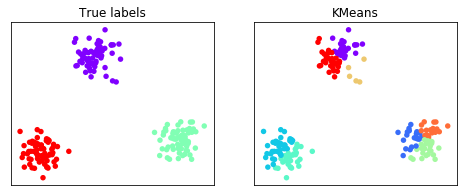

In [7]:
km = clu.KMeans()
km.fit(X);
display_clustering(km.labels_, "KMeans")

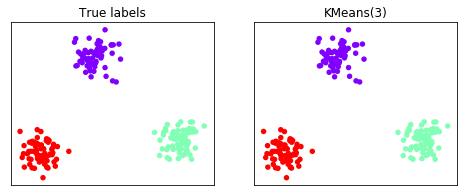

In [8]:
km = clu.KMeans(n_clusters=3)
km.fit(X);
display_clustering(km.labels_, "KMeans(3)")

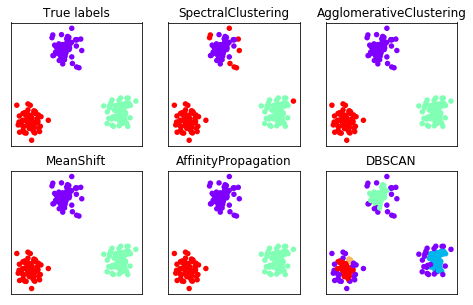

In [9]:
plt.figure(figsize=(8,5));
plt.subplot(231);
plt.scatter(X[:,0], X[:,1], c=y, s=30,
            linewidths=0, cmap=plt.cm.rainbow);
plt.xticks([]); plt.yticks([]);
plt.title("True labels");
for i, est in enumerate([
        clu.SpectralClustering(3),
        clu.AgglomerativeClustering(3),
        clu.MeanShift(),
        clu.AffinityPropagation(),
        clu.DBSCAN(),
    ]):
    est.fit(X);
    c = relabel(est.labels_)
    plt.subplot(232 + i);
    plt.scatter(X[:,0], X[:,1], c=c, s=30,
                linewidths=0, cmap=plt.cm.rainbow);
    plt.xticks([]); plt.yticks([]);
    plt.title(est.__class__.__name__);